In [1]:
import pandas as pd
from pathlib import Path
import random
import torch_geometric
import json

In [2]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from utils import GenerationModule, MolGen, tensor_to_smiles

In [3]:
# read the configs
name1 = 'GNN1_polymers_kekulized'
epoch1 = 0
name2 = 'GNN2_polymers_kekulized'
epoch2 = 0
name3 = 'GNN3_polymers_kekulized'
epoch3 = 0
config1_path = Path('..') / 'Train' / 'GNN1' / 'config_GNN1.json'
config2_path = Path('..') / 'Train' / 'GNN2' / 'config_GNN2.json'
config3_path = Path('..') / 'Train' / 'GNN3' / 'config_GNN3.json'

# Read the config as a json

with open(config1_path, 'r') as f:
    config1 = json.load(f)
with open(config2_path, 'r') as f:
    config2 = json.load(f)
with open(config3_path, 'r') as f:
    config3 = json.load(f)



In [4]:
GNN1_path = Path('.') / 'models/trained_models/GNN1_polymers_checkpoint_4.pt'
GNN2_path = Path('.') / 'models/trained_models/GNN2_polymers_checkpoint_1.pt'
GNN3_path = Path('.') / 'models/trained_models/GNN3_polymers_checkpoint_0.pt'

module = GenerationModule(config1=config1, 
                          config2=config2, 
                          config3=config3, 
                          encoding_size = 8, 
                          edge_size = 3, 
                          pathGNN1=GNN1_path, 
                          pathGNN2=GNN2_path, 
                          pathGNN3=GNN3_path,
                          encoding_type='polymer')


In [14]:
graph = module.generate_mol_list(20)

100%|██████████| 20/20 [00:23<00:00,  1.20s/it]


In [15]:
# Convert the graph to smiles

def convert_to_smiles(graph):
    smiles = []
    for g in graph:
        smiles.append(tensor_to_smiles(g.x, g.edge_index, g.edge_attr, edge_mapping='kekulized', encoding_type='polymer'))
    return smiles

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

def draw_molecules(molecules):
    smiles_list = convert_to_smiles(molecules)
    mols = [Chem.MolFromSmiles(m) for m in smiles_list]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), maxMols=50)

In [17]:
smiles_list = convert_to_smiles(graph)

In [18]:
# check if the molecules are valid

def check_validity(smiles_list):
    valid = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            valid.append(smiles)
    return valid

In [19]:
valid = check_validity(smiles_list)

In [20]:
# get the not valid molecules

not_valid = [smiles for smiles in smiles_list if smiles not in valid]

In [21]:
not_valid

[]

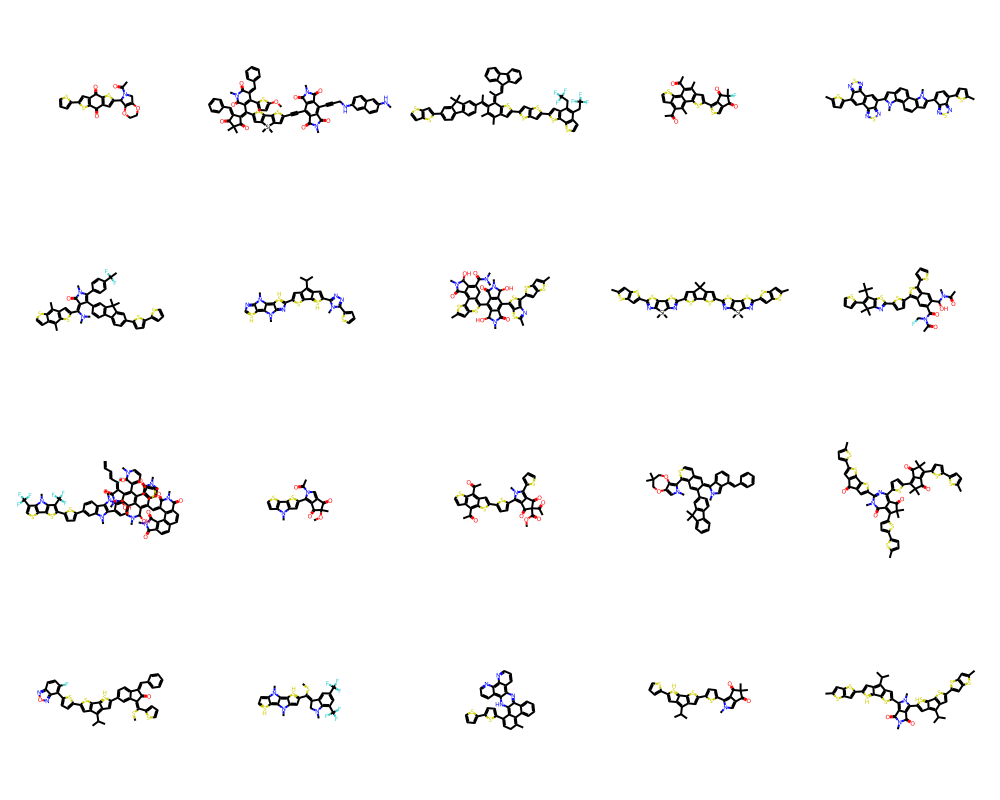

In [22]:
draw_molecules(graph)